<font size=5><b>Защита персональных данных клиентов</b></font>

<h2> Описание проекта <a class="tocSkip"></h2>

В данном проекте необходимо защитить данные клиентов страховой компании: разработать метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и чтобы при преобразовании качество моделей машинного обучения не ухудшилось. 

<h2> План работы <a class="tocSkip"></h2> 

 - Загрузка данных 
 - Удаление дубликатов при наличии
 - Изменение типов данных 
 - Построение матрицы корреляции признаков
 - Построение гистограмм распределения признаков
 - Теоретическое обоснование алгоритма шифрования данных
 - Описание и проверка алгоритма шифрования
 - Выводы

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#R2-на-исходных-данных" data-toc-modified-id="R2-на-исходных-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>R2 на исходных данных</a></span></li><li><span><a href="#R2-на-шифрованных-данных" data-toc-modified-id="R2-на-шифрованных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>R2 на шифрованных данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

## Загрузка данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Загрузим данные

In [2]:
# для открытия файла используем два варианта: для работы на платформе и локально
try:
    df = pd.read_csv('insurance.csv')
except:
    df = pd.read_csv('/datasets/insurance.csv')
df.sample(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4652,1,22.0,45000.0,2,0
4862,0,24.0,25500.0,1,0
420,1,48.0,13800.0,2,1
3909,1,33.0,39000.0,3,0
150,1,21.0,31900.0,1,0
928,1,21.0,30900.0,2,0
4707,0,26.0,36700.0,2,0
2182,1,18.0,45800.0,1,0
835,1,23.0,31500.0,2,0
2591,1,45.0,51000.0,2,1


In [3]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Проверим наличие дубликатов в данных.

In [5]:
df.duplicated().mean()

0.0306

Дубликаты присутствуют, удалим их. 

In [6]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                4847 non-null   int64  
 1   Возраст            4847 non-null   float64
 2   Зарплата           4847 non-null   float64
 3   Члены семьи        4847 non-null   int64  
 4   Страховые выплаты  4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 227.2 KB


Выведем матрицу корреляции признаков.

Text(0.5, 1.0, 'Correlation Heatmap')

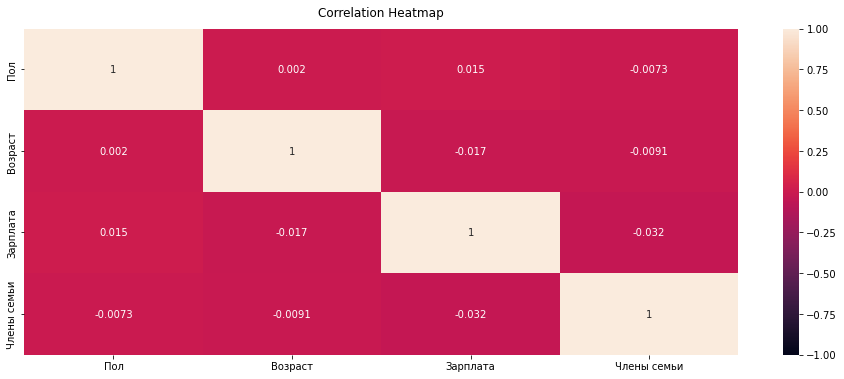

In [7]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(
    df.drop(columns=['Страховые выплаты']).corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

Построим матрицу корреляци в виде треугольного массива. 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1164\1081085846.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.drop(columns=['Страховые выплаты']).corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

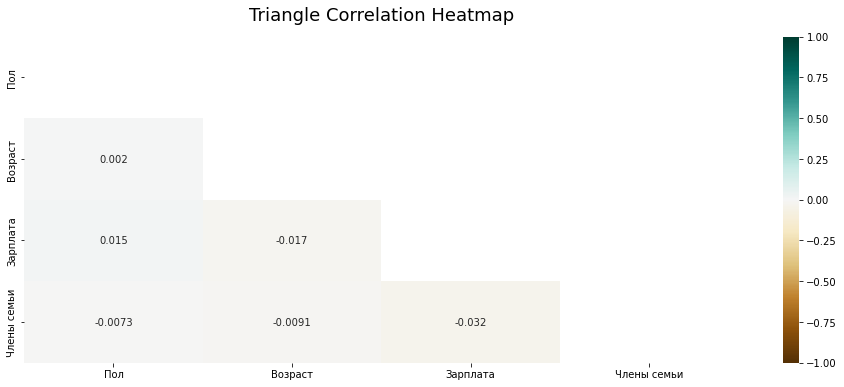

In [8]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(
    df.drop(columns=['Страховые выплаты']).corr(), dtype=np.bool))
heatmap = sns.heatmap(df.drop(columns=['Страховые выплаты']).corr(
), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap',
                  fontdict={'fontsize': 18}, pad=16)

Приведем наши данные к типу Int32

In [9]:
for col in df.columns:
    df[col] = df[col].astype('int32')

Сделаем визуализацию распределения признаков в виде гистограмм.

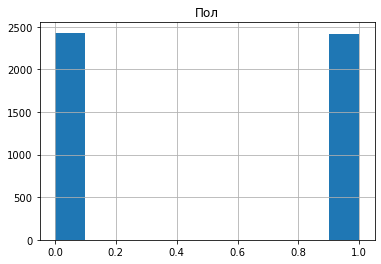

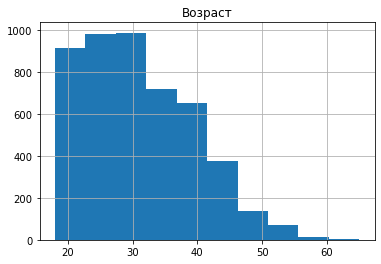

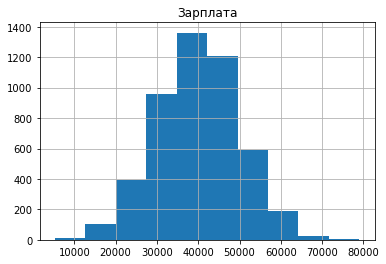

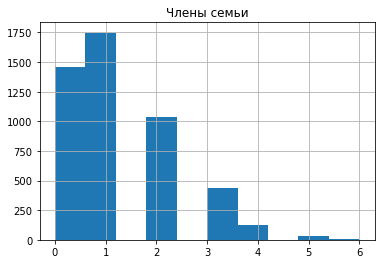

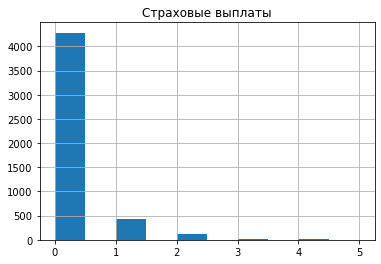

In [10]:
for col in df.columns:
    plt.title(col)
    plt.show(df[col].hist())

### Вывод 

Пропусков нет, данные правдивые, названия столбцов менять не будем. 

Дубликаты удалены. Мультиколлинеарности между признаками не выявлено.

## Умножение матриц

В данном разделе ответим на вопрос: "Изменится ли качество линейной регрессии, если признаки умножить на обратимую матрицу"

Введем обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

При умножении матрицы на обратную матрицу получается единичная матрица E, тогда:


**Обоснование исходного алгоритма:** 

$$
a = Xw = X (X^T X)^{-1} X^T y =(X^T X)^{-1} X^T X y =( (X^T X)^{-1})( X^T X )y  = E E y = y
$$

То есть предсказание **a** "выдает целевой признак" y. 

  

Теперь посмотрим, что изменится, если матрицу фичей X домножить на рандомнуб обратимую матрицу P.

 

**Обоснование алгоритма после умножения на матрицу P:**

$$
    a = XPw =  XP (XP^T XP)^{-1} XP^T y =(XP^T XP)^{-1} XP^T XP y =( (XP^T XP)^{-1})( XP^T XP )y  = E E y = y
$$

**Ответ:** нет, ничего не изменится. 

### Вывод

Таким образом, видно, что при умножении признаков на обратимую матрицу P, ничего не меняется, так как в итоге после преобразований и в том и в другом случае получаем единичные матрицы, умноженные на целевой признак. 


## Алгоритм преобразования

**Алгоритм для исходных данных**
1. Разделим выборку на фичи и целевой признак
2. Выделим обучающую и тестовую выборки
3. Обучим модель Линейной регрессии на исходных данных 
4. Посчитаем r2_score на исходных данных 


**Алгоритм для преобразованных данных**
1. Разделим выборку на фичи и целевой признак
2. Сгенерируем матрицу P
3. Домножим фичи на матрицу P
4. Выделим обучающую и тестовую выборки
5. Обучим модель Линейной регрессии на шифрованных данных
6. Посчитаем r2_score на шифрованных данных
7. Сравним r2_score на исходных и на шифрованных данных

### Вывод

**Обоснование**

При помощи такого элементарного шифрования можно скрыть исходную открытую информацию о клиентах страховой компании, при этом качество модели не изменяется, в чем мы убедимся в следующем разделе проекта. 

## Проверка алгоритма

Напишем общии функции для разделения на фичи и целевой признак, а также  для разделения на обучающую и валидационую выборки.

In [11]:
def split(df, target):
    features = df.drop([target], axis=1)
    target = df[target]
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, train_size=0.75, random_state=12345)

    return features_train, features_valid, target_train, target_valid

In [12]:
def liner_reg(features_train, features_valid, target_train, target_valid, text):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    return (print(f'Оценка для модели на {text} данных: {r2_score(target_valid, predictions).round(3)}'))

### R2 на исходных данных

In [13]:
features_train, features_valid, target_train, target_valid = split(
    df, 'Страховые выплаты')
features_train.shape, features_valid.shape, target_train.shape, target_valid.shape

((3635, 4), (1212, 4), (3635,), (1212,))

In [14]:
liner_reg(features_train, features_valid,
          target_train, target_valid, 'исходных')

Оценка для модели на исходных данных: 0.423


### R2 на шифрованных данных

Создадим случайную матрицу P размером 4 на 4, так как у нас 4 признака. В противном случае операцию скалярного умножения произвести мы не сможем. 

In [15]:
def rnd_matrix(n):
    random_matrix = np.random.normal(size=(n, n))
    try:
        # выполняется операция создания обратной матрицы
        np.linalg.inv(random_matrix)
    except LinAlgError:  # если возникает ошибка, т.е. обратной матрицы не существует, выполняется еще одна попытка
        rnd_matrix(n)
    return random_matrix

In [16]:
P = rnd_matrix(4)
P

array([[-0.69837526, -0.10041794,  2.33795573, -0.18925329],
       [-0.5535926 , -0.67978593, -0.30690584, -0.70489205],
       [ 1.16698785, -0.45163829,  0.17075243,  0.31283358],
       [ 0.08536706,  0.55859377,  1.6535067 , -2.12680103]])

In [17]:
features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']
features = features @ P
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, train_size=0.75, random_state=12345)

Посмотрим, что получилось

In [18]:
display(features_train, features_valid, target_train, target_valid)

,0,1,2,3
4599,63585.507753,-24632.203561,9300.721256,17025.439362
3882,59144.634269,-22923.434934,8649.477401,15831.560397
4705,32662.458835,-12661.628356,4775.355895,8740.295943
1400,45253.109576,-17555.515546,6610.769832,12104.812857
728,37905.046661,-14704.877231,5538.831350,10136.768766
...,...,...,...,...
3592,32895.711621,-12751.376646,4812.151243,8803.378297
3586,39310.968002,-15240.045318,5746.803328,10519.217979
2211,33714.263891,-13065.484090,4932.598664,9024.476477
3653,45260.246864,-17545.540367,6619.057976,12112.365292


,0,1,2,3
1335,55068.395330,-21333.062728,8054.793966,14749.343059
3875,76886.085718,-29784.816803,11245.102313,20592.986919
166,39542.091785,-15331.954158,5784.024560,10577.353964
3003,22501.446052,-8742.013439,3286.859645,6005.943642
424,32066.871242,-12450.205909,4684.881256,8566.244728
...,...,...,...,...
1589,26820.731711,-10411.014975,3920.555720,7168.184993
32,59499.244731,-23052.929540,8704.811884,15928.922805
360,39079.257162,-15145.981747,5719.525434,10455.027976
2862,38613.457890,-14966.222009,5644.232891,10337.169094


4599    0
3882    0
4705    0
1400    1
728     0
       ..
3592    0
3586    0
2211    0
3653    0
4722    0
Name: Страховые выплаты, Length: 3635, dtype: int32

1335    0
3875    0
166     0
3003    0
424     1
       ..
1589    0
32      0
360     0
2862    0
646     2
Name: Страховые выплаты, Length: 1212, dtype: int32

In [19]:
liner_reg(features_train, features_valid,
          target_train, target_valid, 'шифрованных')

Оценка для модели на шифрованных данных: 0.423


### Вывод 

Можно видеть, что теоретическое обоснование, приведенное в раздлах 2 и 3 проекта подтвердилось: после шифрования данных качество модели не изменилось, r2_score не изменился, однако мы имеем значительное преимущество - сокрытие исходных персональных данных от злоумышленника. 

По ячейке №11 с трудом можно определить значение признаков и их содержание. Но суть модели остается такой же: независимо от "шифрования" мы имеем взаимно однозначное соответствие исходных данных и предсказанных. Что и требовалось доказать. 